In [56]:
import pandas as pd
import seaborn as sp
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [57]:
ch = load_diabetes()
list(ch)

['data',
 'target',
 'frame',
 'DESCR',
 'feature_names',
 'data_filename',
 'target_filename',
 'data_module']

In [58]:
ch["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [59]:
x,y = load_diabetes(return_X_y=True)

In [60]:
print(x.shape)

(442, 10)


In [61]:
print(y.shape)

(442,)


In [62]:
defa=pd.DataFrame( x, columns=[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']])
print(defa)
## TO SHOW THE DATA FRAME


          age       sex       bmi        bp        s1        s2        s3   
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [63]:
defb=pd.DataFrame(y, columns=["ayo_progression"])
print(defb)

     ayo_progression
0              151.0
1               75.0
2              141.0
3              206.0
4              135.0
..               ...
437            178.0
438            104.0
439            132.0
440            220.0
441             57.0

[442 rows x 1 columns]


In [64]:
## merging the table together
df=pd.merge(defa,defb, left_index=True,right_index=True)
print(df)

       (age,)    (sex,)    (bmi,)     (bp,)     (s1,)     (s2,)     (s3,)   
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

        (s4,)     (s5,)     (s6,)  ayo_progression  
0   -0.002592  0.01990

In [65]:
df.describe()

,"(age,)","(sex,)","(bmi,)","(bp,)","(s1,)","(s2,)","(s3,)","(s4,)","(s5,)","(s6,)",ayo_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [66]:
## i define the variable X and y
y=df.ayo_progression
x=df.drop(['ayo_progression'],axis=1)
##let me train the data and do some validation
x_train,x_val,y_train,y_val=train_test_split(x,y, test_size=0.1,random_state=1)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((397, 10), (45, 10), (397,), (45,))

In [67]:
ayomodel=LinearRegression().fit(x_train,y_train)
print(ayomodel.score(x_train,y_train))

0.5344506383479622


In [68]:
a=ayomodel.predict(x_val)
print(a)

[122.42355102 111.48143753 184.1856244   68.52089338 171.44089081
 191.06428076 220.61704964 117.98798585 156.55045602 126.4970826
 213.88087837 199.98180452  90.87617641  79.36638048 234.96204695
 204.19671177 176.94268741 101.88546448 111.8580365  170.6059193
 185.83641594  82.11246091 140.77700976 106.88421364  92.28814625
 212.31892449  92.20514526 176.92903877 119.67295252 181.00017666
 156.75632967 138.82057469 197.06370013  98.33752733 163.42361453
 190.93632664 107.61686873 246.79094767 172.97115747 186.61349253
 162.58906258 180.11429424 118.54394446 121.61906954 145.27336643]


In [69]:
## i found my root mean square
rms=mean_squared_error(y_val,a,square=True)

TypeError: mean_squared_error() got an unexpected keyword argument 'square'

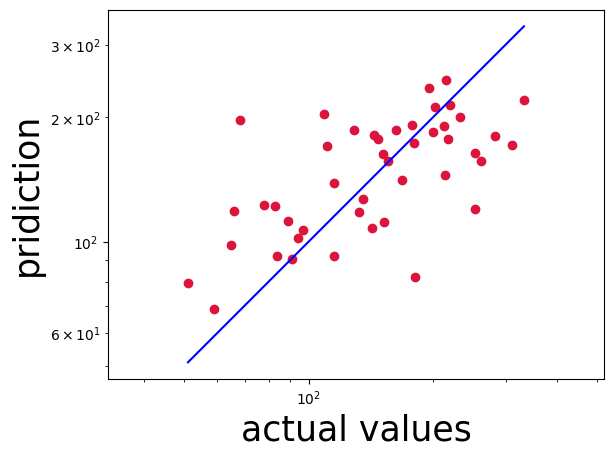

In [ ]:
plt.Figure(figsize=(15,15))
plt.scatter(y_val,a,c='crimson')
plt.yscale('log')
plt.xscale('log')
k1=max(max(a),max(y_val))
k2=min(min(a),min(y_val))
plt.plot([k1,k2],[k1,k2],'b')
plt.xlabel('actual values',fontsize=25)
plt.ylabel('pridiction',fontsize=25)
plt.axis('equal')
plt.show()
